# **CVPS20 // Machine Learning Introduction: Part 2**

*October 15, 2020*

This notebook provides an example of training and testing a supervised Machine Learning model on imaging data.

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gist_gray"

---

### Supervised Learning: Hand-written Digit Recognition with Decision Trees

In [ ]:
# -- load in the hand-written digits data set
fname = "/content/drive/My Drive/cvps20/data/examples/digits.png"
digits = np.asarray(iio.imread(fname)) / 255.

# -- get a list of individual numbers (note they are 20x20 pixels)
nums = digits.reshape(50, 20, 100, 20).transpose(0, 2, 1, 3).reshape(5000, 20, 20)

Before running a decision tree, let's check the accuracy of our template fitting:

In [ ]:
def predict_digit(img, templs):
  """
  Apply template fitting to an image and predict the number.
  """

  # -- solve the normal equation
  P = templs.reshape(10, 400).T
  PTy = np.dot(P.T, img.flatten())
  PTP = np.dot(P.T, P)
  PTPi = np.linalg.inv(PTP)
  avec = np.dot(PTPi, PTy)

  # -- return the guess
  return avec.argmax()

In [ ]:
# -- build templates by taking the mean across all examples
templs = np.zeros((10, 20, 20))

for ii in range(10):
  st = 500 * ii
  en = 500 * (ii + 1)
  templs[ii] = nums[st:en].mean(axis=0)

In [ ]:
# -- set the ground truth
truth = np.concatenate((np.full(500, 0), np.full(500, 1), np.full(500, 2), 
                        np.full(500, 3), np.full(500, 4), np.full(500, 5), 
                        np.full(500, 6), np.full(500, 7), np.full(500, 8), 
                        np.full(500, 9)))

In [ ]:
# -- for each image, predict the digit and keep a running total of how many we
# -- get correct
correct = 0
wrong = 0
nimg = nums.shape[0]
indexwrong = np.zeros(nimg)
guesswrong = np.zeros(nimg)

for ii in range(nimg):

  guess = predict_digit(nums[ii], templs)

  if guess == truth[ii]:
    correct += 1
  else:
    indexwrong[wrong] = ii+1
    guesswrong[wrong] = guess
    wrong += 1 

indexwrong = indexwrong[indexwrong != 0]

In [ ]:
correct

3743

9

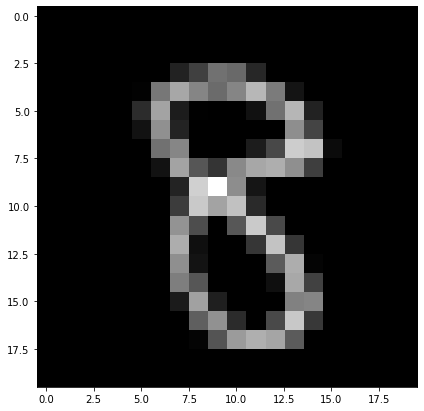

In [ ]:
aa = 1111
plt.imshow(nums[int(indexwrong[aa])])
int(guesswrong[aa])

In [ ]:
# -- print the accuracy
print("{0} correnct out of {1} : {2}".format(correct, nimg, correct / nimg))

3743 correnct out of 5000 : 0.7486


Not bad...  How about if we use a Decision Tree Classifier?  In this case, **each image is an object** and the pixels brightnesses are the features.

Let's reshape the data into the **$N_O \times N_F$** paradigm,


In [ ]:
# -- create features array [NOTE THE .copy()]
nrow = nums.shape[1]
ncol = nums.shape[2]
feat = nums.reshape(nimg, nrow * ncol).copy()

print("shape of features array : {0}".format(feat.shape))

shape of features array : (5000, 400)


In [ ]:
  # -- we already have the target array
targ = truth.copy()

print("shape of target array : {0}".format(targ.shape))

shape of target array : (5000,)


In [ ]:
# -- create a training/testing sample
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat, targ)

print("number of training examples : {0}".format(targ_tr.size))
print("number of testing examples  : {0}".format(targ_te.size))

number of training examples : 3750
number of testing examples  : 1250


In [ ]:
# -- instantiate the Decision Tree Classifier model
dtc = DecisionTreeClassifier( )

In [ ]:
# -- fit the model to the training data
dtc.fit(feat_tr, targ_tr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# -- predict the training and testing sets
pred_tr = dtc.predict(feat_tr)
pred_te = dtc.predict(feat_te)

# -- print the accuracy on the training and testing set
acc_tr = accuracy_score(targ_tr, pred_tr)
acc_te = accuracy_score(targ_te, pred_te)

print("training accuracy : {0}".format(acc_tr))
print("testing accuracy : {0}".format(acc_te))

training accuracy : 1.0
testing accuracy : 0.7808


Model looks to be overfit, let's try to restrict the model a bit to make it less flexible,

In [ ]:
# -- instantiate the Decision Tree Classifier model
dtc1 = DecisionTreeClassifier(min_samples_leaf=10)

# -- fit the model to the training data
dtc1.fit(feat_tr, targ_tr)

# -- predict the training and testing sets
pred_tr = dtc1.predict(feat_tr)
pred_te = dtc1.predict(feat_te)

# -- print the accuracy on the training and testing set
acc_tr = accuracy_score(targ_tr, pred_tr)
acc_te = accuracy_score(targ_te, pred_te)

print("training accuracy : {0}".format(acc_tr))
print("testing accuracy : {0}".format(acc_te))

training accuracy : 0.8581333333333333
testing accuracy : 0.7696


Let's further evaluate the performance with the confusion, precision, and recall for the fit model,

In [ ]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [ ]:
print(classification_report(targ_te, pred_te))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       111
           1       0.89      0.90      0.89       126
           2       0.69      0.71      0.70       117
           3       0.65      0.60      0.62       109
           4       0.76      0.78      0.77       131
           5       0.76      0.69      0.73       134
           6       0.77      0.81      0.79       118
           7       0.86      0.82      0.84       140
           8       0.71      0.65      0.68       138
           9       0.70      0.85      0.77       126

    accuracy                           0.77      1250
   macro avg       0.77      0.77      0.77      1250
weighted avg       0.77      0.77      0.77      1250



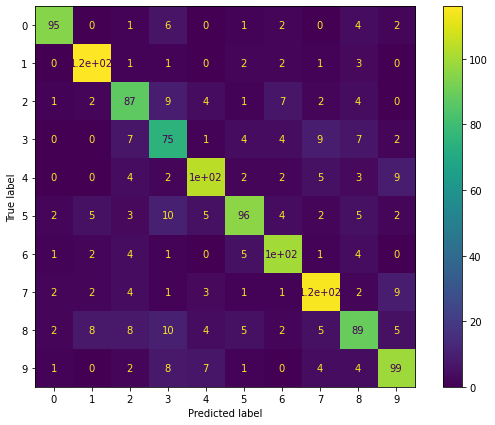

In [ ]:
plot_confusion_matrix(dtc, feat_te, targ_te)